In [1]:
import pandas as pd

df = pd.read_csv("./salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [2]:
inputs = df.drop("salary_more_then_100k", axis=1)
target = df["salary_more_then_100k"]
print(inputs)

       company                  job     degree
0       google      sales executive  bachelors
1       google      sales executive    masters
2       google     business manager  bachelors
3       google     business manager    masters
4       google  computer programmer  bachelors
5       google  computer programmer    masters
6   abc pharma      sales executive    masters
7   abc pharma  computer programmer  bachelors
8   abc pharma     business manager  bachelors
9   abc pharma     business manager    masters
10    facebook      sales executive  bachelors
11    facebook      sales executive    masters
12    facebook     business manager  bachelors
13    facebook     business manager    masters
14    facebook  computer programmer  bachelors
15    facebook  computer programmer    masters


In [3]:
# converting labels into numeric values

from sklearn.preprocessing import LabelEncoder

# creating label encoder for each of the label
leCompany = LabelEncoder()
leJob = LabelEncoder()
leDegree = LabelEncoder()


In [4]:
# creating extra columns for encoded labels in data frame

inputs["encComp"] = leCompany.fit_transform(inputs["company"])

inputs["encJob"] = leJob.fit_transform(inputs["job"])

inputs["encDegree"] = leCompany.fit_transform(inputs["degree"])

In [5]:
inputs.head()


,company,job,degree,encComp,encJob,encDegree
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [6]:
newInput = inputs.drop(["degree","job","company"], axis=1)

In [7]:
newInput.head()


,encComp,encJob,encDegree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [8]:
from sklearn import tree
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(newInput, target, test_size=0.2)

model = tree.DecisionTreeClassifier(criterion="entropy")

model.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
print(model.score(x_test, y_test))

0.5


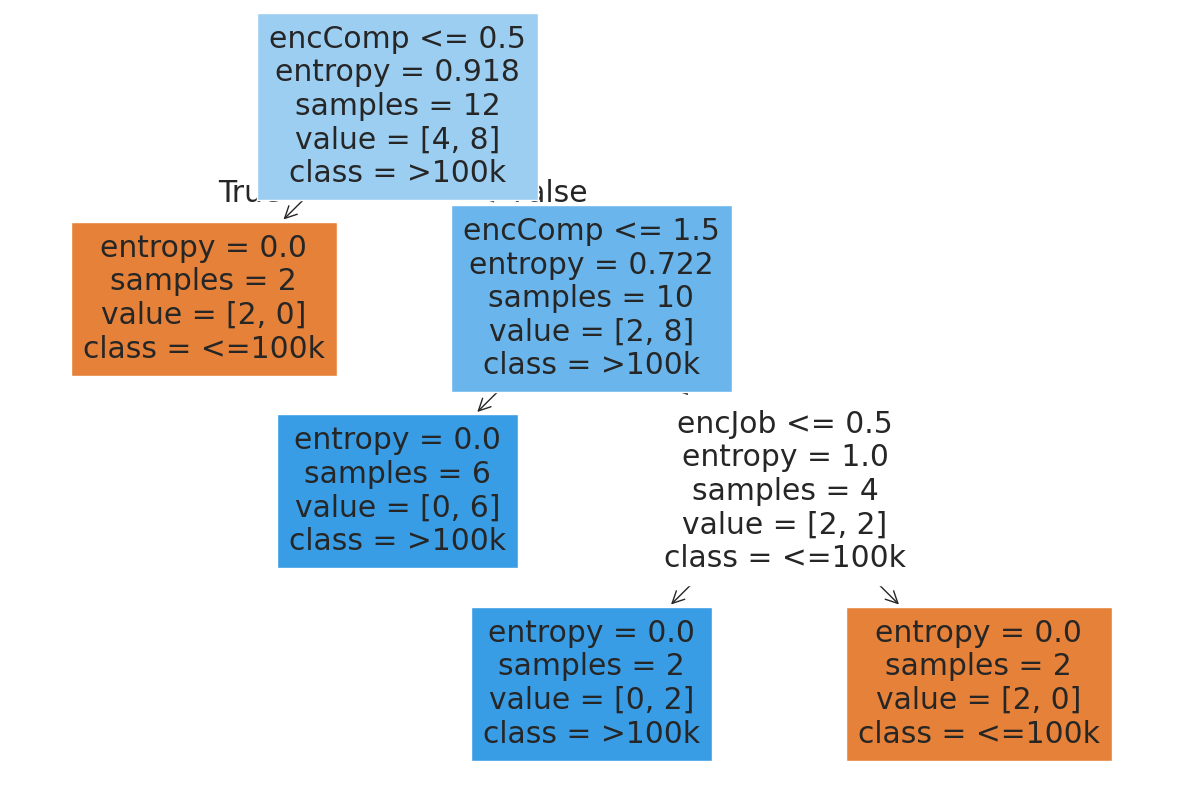

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
tree.plot_tree(model,
               feature_names=['encComp', 'encJob', 'encDegree'],
               class_names=['<=100k', '>100k'],
               filled=True)
plt.show()



In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict
y_pred = model.predict(x_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4


Confusion Matrix:
 [[2 0]
 [2 0]]


/home/alpha/Projects/FourWeekAi/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/alpha/Projects/FourWeekAi/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/alpha/Projects/FourWeekAi/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"